In [11]:
import pandas as pd
from sklearn import *
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [5]:
df = df[~df.SalesPrice.isnull()]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [7]:
df.drop(columns="Id", inplace= True)

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [15]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)


print("train rmse:", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("test rmse:", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

print("train r2:", metrics.r2_score(y_train, y_train_pred) ** 0.5)
print("test r2:", metrics.r2_score(y_test, y_test_pred) ** 0.5)

train rmse: 0.08606255572747692
test rmse: 28381194035.598663
train r2: 0.9744015767861882
test r2: nan


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [16]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()), 
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("train rmse:", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("test rmse:", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

print("train r2:", metrics.r2_score(y_train, y_train_pred) ** 0.5)
print("test r2:", metrics.r2_score(y_test, y_test_pred) ** 0.5)

train rmse: 0.08606255572747692
test rmse: 28381194035.598663
train r2: 0.9744015767861882
test r2: nan


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [20]:
est = pipe.steps[-1][-1]

In [23]:
summary = pd.DataFrame({"feature": est.coef_, "coffiecient": est.coef_}) 

In [24]:
summary

,feature,coffiecient
0,0.012883,0.012883
1,0.001942,0.001942
2,0.031592,0.031592
3,0.056543,0.056543
4,0.034727,0.034727
...,...,...
253,0.001843,0.001843
254,0.011242,0.011242
255,0.000978,0.000978
256,0.029068,0.029068


In [25]:
summary["coff_abs"] = np.abs(summary.coffiecient)

In [27]:
summary.sort_values("coff_abs", ascending=False)

,feature,coffiecient,coff_abs
163,5.202508e+10,5.202508e+10,5.202508e+10
176,-4.560164e+10,-4.560164e+10,4.560164e+10
219,4.035253e+10,4.035253e+10,4.035253e+10
8,2.446217e+10,2.446217e+10,2.446217e+10
11,-2.366592e+10,-2.366592e+10,2.366592e+10
...,...,...,...
203,-3.539920e-04,-3.539920e-04,3.539920e-04
45,-1.975894e-04,-1.975894e-04,1.975894e-04
158,-1.811981e-04,-1.811981e-04,1.811981e-04
42,4.386902e-05,4.386902e-05,4.386902e-05


In [39]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()), 
    ("est", linear_model.Lasso(alpha=.01))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

est = pipe.steps[-1][-1]

print("train rmse:", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("test rmse:", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

print("train r2:", metrics.r2_score(y_train, y_train_pred) ** 0.5)
print("test r2:", metrics.r2_score(y_test, y_test_pred) ** 0.5)

summary = pd.DataFrame({"feature": est.coef_, "coffiecient": est.coef_}) 
summary["coff_abs"] = np.abs(summary.coffiecient)
summary.sort_values("coff_abs", ascending=False)

train rmse: 0.12460754170603186
test rmse: 0.1515085902988598
train r2: 0.9455411505483853
test r2: 0.937304112223218


,feature,coffiecient,coff_abs
3,0.104135,0.104135,0.104135
15,0.095563,0.095563,0.095563
25,0.055896,0.055896,0.055896
5,0.029465,0.029465,0.029465
39,-0.026432,-0.026432,0.026432
...,...,...,...
109,0.000000,0.000000,0.000000
110,0.000000,0.000000,0.000000
111,0.000000,0.000000,0.000000
112,0.000000,0.000000,0.000000


In [46]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 4451)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()), 
    ("est", linear_model.Ridge(alpha=20))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

est = pipe.steps[-1][-1]

print("train rmse:", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("test rmse:", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

print("train r2:", metrics.r2_score(y_train, y_train_pred) ** 0.5)
print("test r2:", metrics.r2_score(y_test, y_test_pred) ** 0.5)

summary = pd.DataFrame({"feature": est.coef_, "coffiecient": est.coef_}) 
summary["coff_abs"] = np.abs(summary.coffiecient)
summary.sort_values("coff_abs", ascending=False)

train rmse: 0.09756354164131659
test rmse: 0.17163831607664592
train r2: 0.9691808219543472
test r2: 0.9054308896878427


,feature,coffiecient,coff_abs
38,0.071203,0.071203,0.071203
3,0.061798,0.061798,0.061798
39,0.054856,0.054856,0.054856
15,0.053760,0.053760,0.053760
5,0.051354,0.051354,0.051354
...,...,...,...
92,0.000000,0.000000,0.000000
139,0.000000,0.000000,0.000000
113,0.000000,0.000000,0.000000
197,0.000000,0.000000,0.000000


In [48]:
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=5)

In [50]:
%matplotlib inline

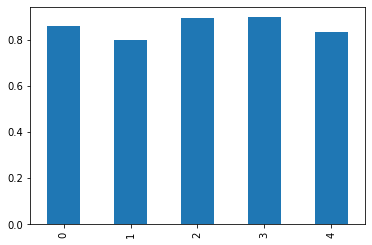

In [51]:
pd.Series(scores).plot.bar()

In [52]:
np.mean(scores), np.std(scores)

(0.8560779253663384, 0.037515556374824496)

In [56]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 4451)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()), 
    ("est", linear_model.ElasticNet(alpha=0.1, l1_ratio=0.1))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

est = pipe.steps[-1][-1]

print("train rmse:", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("test rmse:", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

print("train r2:", metrics.r2_score(y_train, y_train_pred) ** 0.5)
print("test r2:", metrics.r2_score(y_test, y_test_pred) ** 0.5)

summary = pd.DataFrame({"feature": est.coef_, "coffiecient": est.coef_}) 
summary["coff_abs"] = np.abs(summary.coffiecient)
summary.sort_values("coff_abs", ascending=False)

train rmse: 0.12456907182060045
test rmse: 0.16762400174584796
train r2: 0.9492441923432802
test r2: 0.9100194520784076


,feature,coffiecient,coff_abs
3,0.090949,0.090949,0.090949
15,0.076907,0.076907,0.076907
11,0.042021,0.042021,0.042021
5,0.031406,0.031406,0.031406
4,0.024692,0.024692,0.024692
...,...,...,...
115,-0.000000,-0.000000,0.000000
116,0.000000,0.000000,0.000000
117,-0.000000,-0.000000,0.000000
118,0.000000,0.000000,0.000000


In [57]:
np.linspace(0, 10, 20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [58]:
param_grid = {
    "est__alpha": np.linspace(0, 10, 20),
    "est__l1_ratio": np.linspace(0, 1, 10),
}

In [59]:
gsearch = model_selection.GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=8)

In [60]:
gsearch.fit(X, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 410 tasks      | elapsed:   10.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   20.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.42606425014531, tolerance: 0.02328006589886511
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        ElasticNet(alpha=0.1, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.1, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                          

In [61]:
gsearch.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('est',
                 ElasticNet(alpha=0.5263157894736842, copy_X=True,
                            fit_intercept=True, l1_ratio=0.0, max_iter=1000,
                            normalize=False, positive=False, precompute=False,
                            random_state=None, selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [62]:
gsearch.best_score_

0.8651454806980009

In [63]:
gsearch.best_params_

{'est__alpha': 0.5263157894736842, 'est__l1_ratio': 0.0}

In [64]:
import pickle

In [65]:
with open("/tmp/model.pickle", "wb") as f:
    pickle.dump(gsearch, f)

In [66]:
!ls -l /tmp/model.pickle 

-rw-r--r--  1 abasar  wheel  45329 Sep 17 13:07 /tmp/model.pickle


In [67]:
with open("/tmp/model.pickle", "rb") as f:
    model = pickle.load(f)

In [70]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

est = pipe.steps[-1][-1]

print("train rmse:", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("test rmse:", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

print("train r2:", metrics.r2_score(y_train, y_train_pred) ** 0.5)
print("test r2:", metrics.r2_score(y_test, y_test_pred) ** 0.5)

train rmse: 0.12012649346893403
test rmse: 0.1237331650375914
train r2: 0.9528879714406461
test r2: 0.9520265967977888


In [71]:
a = [3, 10, 7, 10]

In [72]:
a[0]

3

In [73]:
a[3]

10

In [74]:
a[-1]

10